In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

IMPORTING FILES

In [2]:
transcation_data =  pd.read_excel('C:/Users/MamikiMkn/Desktop/Quantium project/Data/QVI_transaction_data.xlsx')
purchase_behaviour = pd.read_csv('C:/Users/MamikiMkn/Desktop/Quantium project/Data/QVI_purchase_behaviour.csv')

SHOWING DATASET

In [3]:
transcation_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
purchase_behaviour

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


CHECKING DATA TYPES AND MISSING DATA

In [5]:
transcation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


CHECKING CATEGORIES AND COUNT

In [7]:
purchase_behaviour['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

CHECKING WHICH PEOPLE BUY MORE

In [8]:
purchase_behaviour['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

CHECKING INCONSISTENCY IN THE PRODUCT NAME

In [9]:
transcation_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

SEPARATING THE INFORMATION IN THE PROD_NAME INTO COLUMNS

In [10]:
transcation_data['WEIGHT'] = transcation_data['PROD_NAME'].str[-4:]

In [11]:
transcation_data['WEIGHT']

0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: WEIGHT, Length: 264836, dtype: object

In [12]:
transcation_data['WEIGHT'].value_counts()

WEIGHT
175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
Salt     3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: count, dtype: int64

In [13]:
row = transcation_data.query("WEIGHT == 'Salt'")
row

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT
65,43605,83,83008,82099,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Salt
153,43602,208,208139,206906,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Salt
174,43332,237,237227,241132,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Salt
177,43602,243,243070,246706,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Salt
348,43399,7,7077,6604,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Salt
...,...,...,...,...,...,...,...,...,...
264564,43381,260,260240,259480,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Salt
264574,43628,261,261035,259860,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Salt
264725,43301,266,266413,264246,63,Kettle 135g Swt Pot Sea Salt,1,4.2,Salt
264767,43624,269,269133,265839,63,Kettle 135g Swt Pot Sea Salt,2,8.4,Salt


CORRECTING DATA AND MAKING CHANGES WHERE NECESSARY

In [14]:
transcation_data['WEIGHT'] = transcation_data['WEIGHT'].replace({'Salt':'135g','210G':'210g','150G':'150g','175G':'175g'})

In [15]:
transcation_data['WEIGHT'].value_counts()

WEIGHT
175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: count, dtype: int64

In [16]:
transcation_data['BRAND'] = transcation_data['PROD_NAME'].str.split().str.get(0)

In [17]:
transcation_data['BRAND'].value_counts()

BRAND
Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [18]:
transcation_data['BRAND'] = transcation_data['BRAND'].replace({'Dorito':'Doritos', 'Smiths':'Smith','Infzns':'Infuzions','Red':'Red Rock Deli',
'RRD':'Red Rock Deli','Snbts':'Sunbites','WW':'Woolworths',
'GrnWves':'Craves','Natural':'Natural Chip Co','NCC':'Natural Chip Co'})

In [19]:
transcation_data['BRAND'].value_counts()

BRAND
Kettle             41288
Smith              31823
Doritos            28147
Pringles           25102
Red Rock Deli      17779
Woolworths         14757
Infuzions          14201
Thins              14075
Cobs                9693
Tostitos            9471
Twisties            9454
Old                 9324
Natural Chip Co     7469
Tyrrells            6442
Grain               6272
Cheezels            4603
CCs                 4551
Sunbites            3008
Cheetos             2927
Burger              1564
Craves              1468
French              1418
Name: count, dtype: int64

CHECKING OUTLIERS

In [20]:
def detect_outliers(transcation_data):

    threshold = 5
    mean = np.mean(transcation_data['PROD_QTY'])
    std_dev = np.std(transcation_data['PROD_QTY'])

    z_scores = (transcation_data['PROD_QTY'] - mean)/ std_dev

    outliers = transcation_data[np.abs(z_scores) > 5]
    
    return outliers

In [21]:
outliers = detect_outliers(transcation_data)
outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380g,Doritos
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380g,Doritos


In [22]:
transcation_data = transcation_data.drop([0,1])
transcation_data = transcation_data.reset_index(drop=True)

In [23]:
transcation_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND
0,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smith
1,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smith
2,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle
3,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300g,Old
4,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g,Smith
...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos


In [24]:
merged_data = pd.merge(transcation_data, purchase_behaviour, on='LYLTY_CARD_NBR', how='left')
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WEIGHT,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smith,MIDAGE SINGLES/COUPLES,Budget
1,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smith,MIDAGE SINGLES/COUPLES,Budget
2,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget
3,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,300g,Old,MIDAGE SINGLES/COUPLES,Budget
4,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330g,Smith,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,YOUNG SINGLES/COUPLES,Premium
264830,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium
264831,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos,YOUNG SINGLES/COUPLES,Premium
264832,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos,YOUNG SINGLES/COUPLES,Premium


ORGANISING THE COLUMNS 

In [40]:
merged_data = merged_data[['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','LIFESTAGE','PREMIUM_CUSTOMER',
                           'PROD_NBR','BRAND','PROD_NAME','WEIGHT','PROD_QTY','TOT_SALES']]
merged_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,LIFESTAGE,PREMIUM_CUSTOMER,PROD_NBR,BRAND,PROD_NAME,WEIGHT,PROD_QTY,TOT_SALES
0,43605,1,1343,383,MIDAGE SINGLES/COUPLES,Budget,61,Smith,Smiths Crinkle Cut Chips Chicken 170g,170g,2,2.9
1,43329,2,2373,974,MIDAGE SINGLES/COUPLES,Budget,69,Smith,Smiths Chip Thinly S/Cream&Onion 175g,175g,5,15.0
2,43330,2,2426,1038,MIDAGE SINGLES/COUPLES,Budget,108,Kettle,Kettle Tortilla ChpsHny&Jlpno Chili 150g,150g,3,13.8
3,43604,4,4074,2982,MIDAGE SINGLES/COUPLES,Budget,57,Old,Old El Paso Salsa Dip Tomato Mild 300g,300g,1,5.1
4,43601,4,4149,3333,MIDAGE SINGLES/COUPLES,Budget,16,Smith,Smiths Crinkle Chips Salt & Vinegar 330g,330g,1,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,43533,272,272319,270088,YOUNG SINGLES/COUPLES,Premium,89,Kettle,Kettle Sweet Chilli And Sour Cream 175g,175g,2,10.8
264830,43325,272,272358,270154,YOUNG SINGLES/COUPLES,Premium,74,Tostitos,Tostitos Splash Of Lime 175g,175g,1,4.4
264831,43410,272,272379,270187,YOUNG SINGLES/COUPLES,Premium,51,Doritos,Doritos Mexicana 170g,170g,2,8.8
264832,43461,272,272379,270188,YOUNG SINGLES/COUPLES,Premium,42,Doritos,Doritos Corn Chip Mexican Jalapeno 150g,150g,2,7.8


In [25]:
merged_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,43464.036030,135.081123,1.355505e+05,1.351593e+05,56.583316,1.907304,7.304208
std,105.389255,76.783586,8.057944e+04,7.813244e+04,32.826604,0.643653,3.083236
min,43282.000000,1.000000,1.002000e+03,2.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760325e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351385e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030948e+05,2.027018e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


DATA VISUALIZATION

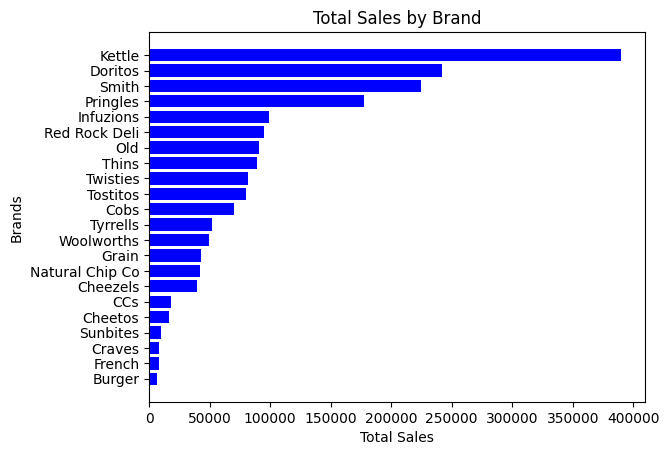

In [26]:
total_sales_by_brand = merged_data.groupby('BRAND')['TOT_SALES'].sum().reset_index()
total_sales_by_brand = total_sales_by_brand.sort_values(by='TOT_SALES', ascending=True)

plt.barh(total_sales_by_brand['BRAND'],total_sales_by_brand['TOT_SALES'],color='blue')
plt.xlabel('Total Sales')
plt.ylabel('Brands')
plt.title('Total Sales by Brand')
plt.show()

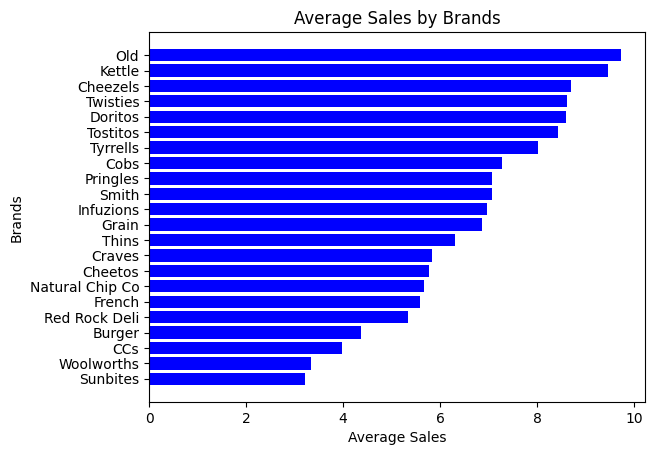

In [27]:
average_sales_by_brand = merged_data.groupby('BRAND')['TOT_SALES'].mean().reset_index()
average_sales_by_brand = average_sales_by_brand.sort_values(by='TOT_SALES', ascending=True)

plt.barh(average_sales_by_brand['BRAND'], average_sales_by_brand['TOT_SALES'], color='blue')
plt.xlabel('Average Sales')
plt.ylabel('Brands')
plt.title('Average Sales by Brands')
plt.show()

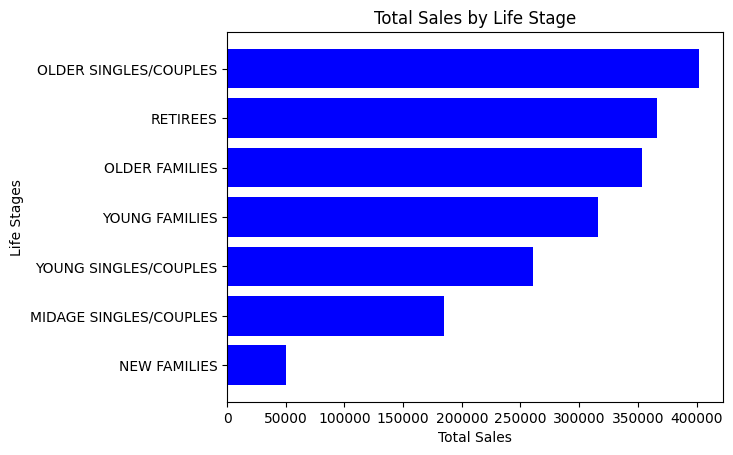

In [28]:
total_sales_by_lifestage = merged_data.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()
total_sales_by_lifestage = total_sales_by_lifestage.sort_values(by='TOT_SALES', ascending=True)

plt.barh(total_sales_by_lifestage['LIFESTAGE'],total_sales_by_lifestage['TOT_SALES'],color='blue')
plt.xlabel('Total Sales')
plt.ylabel('Life Stages')
plt.title('Total Sales by Life Stage')
plt.show()

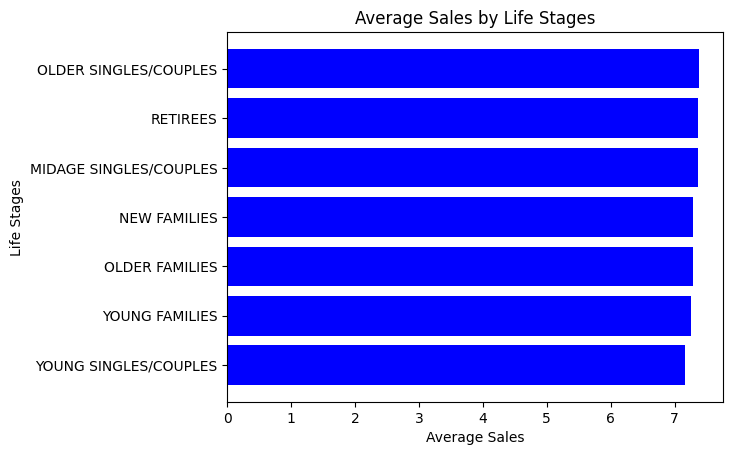

In [29]:
average_sales_by_lifestages = merged_data.groupby('LIFESTAGE')['TOT_SALES'].mean().reset_index()
average_sales_by_lifestages = average_sales_by_lifestages.sort_values(by='TOT_SALES', ascending=True)

plt.barh(average_sales_by_lifestages['LIFESTAGE'], average_sales_by_lifestages['TOT_SALES'], color='blue')
plt.xlabel('Average Sales')
plt.ylabel('Life Stages')
plt.title('Average Sales by Life Stages')
plt.show()

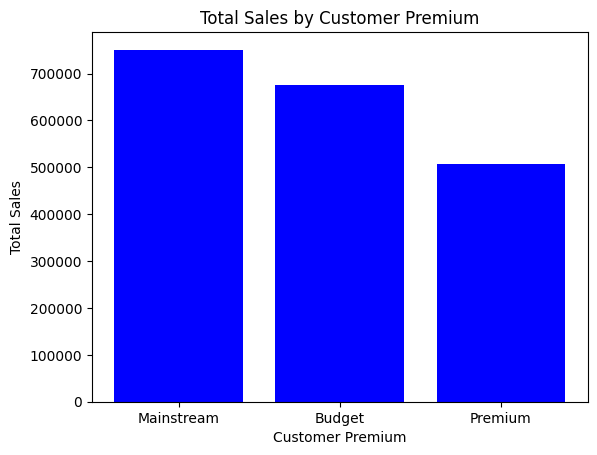

In [31]:
total_sales_by_premium = merged_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()
total_sales_by_premium = total_sales_by_premium.sort_values(by='TOT_SALES', ascending=False)

plt.bar(total_sales_by_premium['PREMIUM_CUSTOMER'],total_sales_by_premium['TOT_SALES'], color='blue')
plt.xlabel('Customer Premium')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Premium')
plt.show()

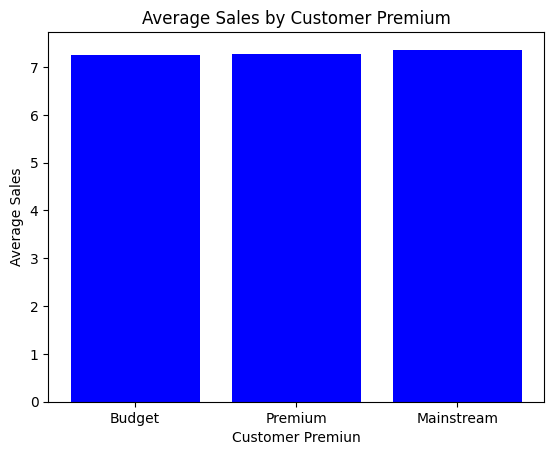

In [32]:
average_sales_by_premium = merged_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean().reset_index()
average_sales_by_premium = average_sales_by_premium.sort_values(by='TOT_SALES', ascending=True)

plt.bar(average_sales_by_premium['PREMIUM_CUSTOMER'], average_sales_by_premium['TOT_SALES'], color='blue')
plt.xlabel('Customer Premiun')
plt.ylabel('Average Sales')
plt.title('Average Sales by Customer Premium')
plt.show()

In [33]:
average_sales_by_premium

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,7.258848
2,Premium,7.281575
1,Mainstream,7.361106


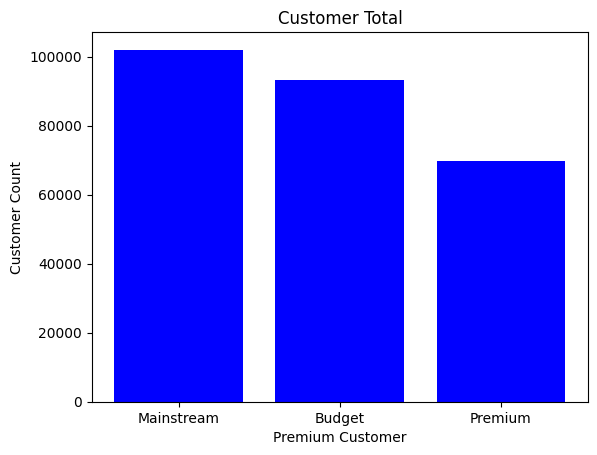

In [34]:
customer_total = merged_data['PREMIUM_CUSTOMER'].value_counts()

plt.bar(customer_total.index, customer_total.values, color='blue')

plt.title('Customer Total')
plt.xlabel('Premium Customer')
plt.ylabel('Customer Count')
plt.show()

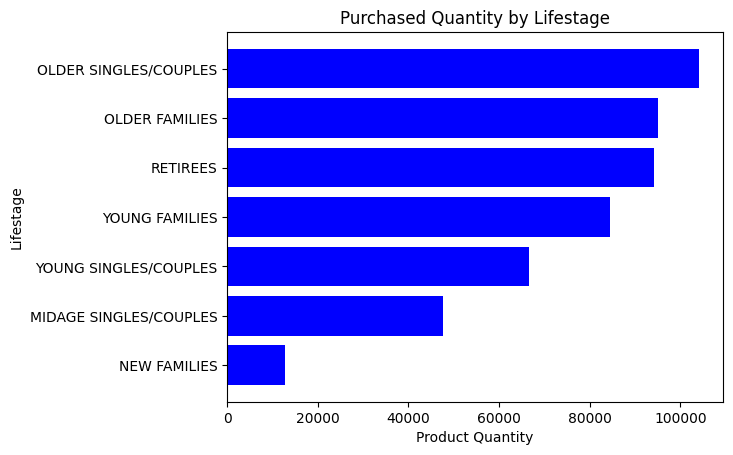

In [35]:
purchased_quantity = merged_data.groupby('LIFESTAGE')['PROD_QTY'].sum().reset_index()
purchased_quantity = purchased_quantity.sort_values(by='PROD_QTY', ascending=True)

plt.barh(purchased_quantity['LIFESTAGE'], purchased_quantity['PROD_QTY'], color='blue')
plt.xlabel('Product Quantity')
plt.ylabel('Lifestage')
plt.title('Purchased Quantity by Lifestage')
plt.show()

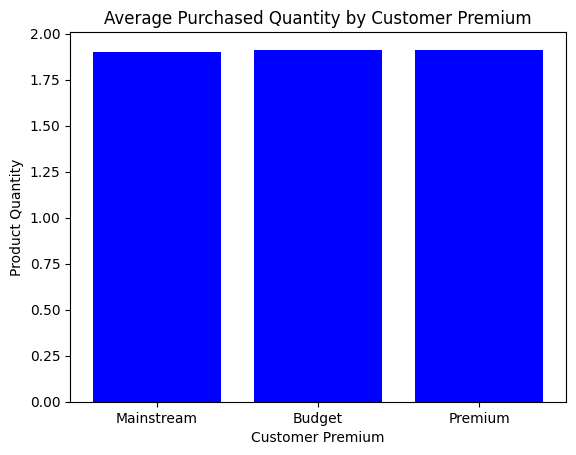

In [36]:
average_purchased_quantity = merged_data.groupby('PREMIUM_CUSTOMER')['PROD_QTY'].mean().reset_index()
average_purchased_quantity = average_purchased_quantity.sort_values(by='PROD_QTY', ascending=True)

plt.bar(average_purchased_quantity['PREMIUM_CUSTOMER'], average_purchased_quantity['PROD_QTY'], color='blue')
plt.xlabel('Customer Premium')
plt.ylabel('Product Quantity')
plt.title('Average Purchased Quantity by Customer Premium')
plt.show()

In [37]:
average_purchased_quantity

,PREMIUM_CUSTOMER,PROD_QTY
1,Mainstream,1.901841
0,Budget,1.909646
2,Premium,1.912168


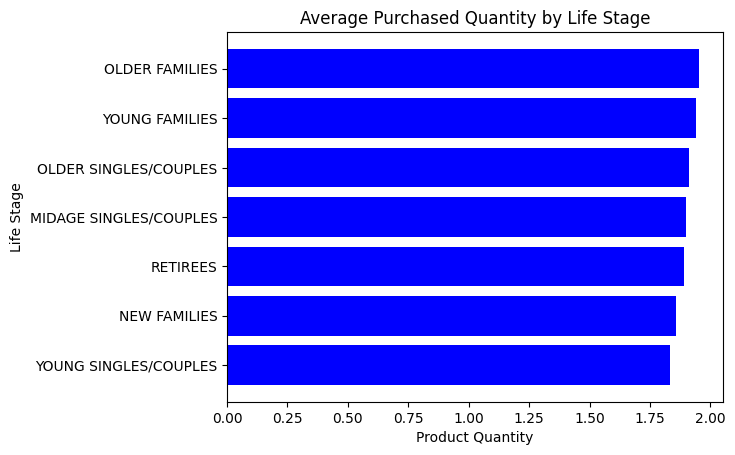

In [38]:
average_purchased_quantity1 = merged_data.groupby('LIFESTAGE')['PROD_QTY'].mean().reset_index()
average_purchased_quantity1 = average_purchased_quantity1.sort_values(by='PROD_QTY', ascending=True)

plt.barh(average_purchased_quantity1['LIFESTAGE'], average_purchased_quantity1['PROD_QTY'], color='blue')
plt.xlabel('Product Quantity')
plt.ylabel('Life Stage')
plt.title('Average Purchased Quantity by Life Stage')
plt.show()

In [39]:
average_purchased_quantity1

,LIFESTAGE,PROD_QTY
6,YOUNG SINGLES/COUPLES,1.831757
1,NEW FAMILIES,1.856771
4,RETIREES,1.892289
0,MIDAGE SINGLES/COUPLES,1.900434
3,OLDER SINGLES/COUPLES,1.912719
5,YOUNG FAMILIES,1.939828
2,OLDER FAMILIES,1.954729
